In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
DATA_FOLDER = '../DATA'
files = os.listdir(DATA_FOLDER)
sds_files = [i for i in files if 'sds011' in i]
bme_files = [i for i in files if 'bme280' in i]
dht_files = [i for i in files if 'dht22' in i]

In [3]:
with open('../processing_lists/sensorID_list.txt', 'r') as sensors:
    sensor_list = sensors.read().splitlines()
    indoor_sensors = [i for i in sensor_list if 'indoor' in i]

In [4]:
sds_files = [i for i in sds_files if i.split('_')[0] not in indoor_sensors]
bme_files = [i for i in bme_files if i.split('_')[0] not in indoor_sensors]
dht_files = [i for i in dht_files if i.split('_')[0] not in indoor_sensors]

In [5]:
data = pd.read_csv(os.path.join(
    DATA_FOLDER, '26717_bme280_sensor_.csv'), delimiter=';', parse_dates=['timestamp'], index_col=5)
data.head()

,sensor_id,sensor_type,location,lat,lon,pressure,altitude,pressure_sealevel,temperature,humidity
timestamp,,,,,,,,,,
2019-05-27 18:12:41,26717,BME280,14325,55.684,37.584,99031.29,NaN,NaN,18.46,43.94
2019-05-27 18:15:22,26717,BME280,14325,55.684,37.584,99037.25,NaN,NaN,18.39,44.21
2019-05-27 18:17:56,26717,BME280,14325,55.684,37.584,99032.41,NaN,NaN,18.33,44.31
2019-05-27 18:20:30,26717,BME280,14325,55.684,37.584,99032.87,NaN,NaN,18.35,44.31
2019-05-27 18:23:03,26717,BME280,14325,55.684,37.584,99031.01,NaN,NaN,18.33,44.49


In [6]:
sensors_data =[]

In [7]:
idx = pd.date_range('2019-04-01', '2019-12-10', freq='5T')

In [8]:
sds_data = pd.DataFrame(idx, columns=['date'])
sds_data = sds_data.set_index('date')

In [9]:
bme_data = pd.DataFrame(idx, columns=['date'])
bme_data = bme_data.set_index('date')

In [10]:
from pandas.errors import EmptyDataError
for f in bme_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['pressure'] = data.pressure.replace('unavailable', None)
        data['temperature'] = data.temperature.replace('unavailable', None)
        data['humidity'] = data.humidity.replace('unavailable', None)
        data['pressure'] = data.pressure.astype(float)
        data['temperature'] = data.temperature.astype(float)
        data['humidity'] = data.humidity.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        bme_data['pressure_'+str(s_id)] = new_data.pressure
        bme_data['temperature_'+str(s_id)] = new_data.temperature
        bme_data['humidity_'+str(s_id)] = new_data.humidity
    except EmptyDataError:
        pass

In [11]:
from pandas.errors import EmptyDataError
for f in sds_files:
    try:
        data = pd.read_csv(os.path.join(
            DATA_FOLDER, f), delimiter=';', parse_dates=['timestamp'], index_col=5)
        s_id = data.iloc[0].sensor_id
        s_type = data.iloc[0].sensor_type
        lat = data.iloc[0].lat
        lon = data.iloc[0].lon
        sensors_data.append([s_id, s_type, lat, lon])
        data['P1'] = data.P1.replace('unavailable', None)
        data['P2'] = data.P2.replace('unavailable', None)
        data['P1'] = data.P1.astype(float)
        data['P2'] = data.P2.astype(float)
        new_data = data['2019-04':].resample('5T').mean()
        new_data.reindex(idx, fill_value=None)
        sds_data['P1_'+str(s_id)] = new_data.P1
        sds_data['P2_'+str(s_id)] = new_data.P2
    except EmptyDataError:
        pass

/home/anatoly/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
sensors = pd.DataFrame(sensors_data, columns=['sensor_id', 'sensor_type', 'lat', 'lon'])

In [13]:
bme_data.head()

,pressure_26717,temperature_26717,humidity_26717,pressure_32440,temperature_32440,humidity_32440,pressure_35435,temperature_35435,humidity_35435,pressure_32710,...,humidity_35443,pressure_32338,temperature_32338,humidity_32338,pressure_30732,temperature_30732,humidity_30732,pressure_34670,temperature_34670,humidity_34670
date,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
p1_col = [i for i in sds_data.columns if 'P1_' in i]
p2_col = [i for i in sds_data.columns if 'P2_' in i]

In [15]:
temp_col = [i for i in bme_data.columns if 'temperature_' in i]
pres_col = [i for i in bme_data.columns if 'pressure_' in i]
hum_col = [i for i in bme_data.columns if 'humidity_' in i]

In [16]:
avg_data = pd.DataFrame(idx, columns=['date'])
avg_data = avg_data.set_index('date')

In [17]:
avg_data['P1'] = sds_data[p1_col].mean(axis = 1, skipna = True)
avg_data['P2'] = sds_data[p2_col].mean(axis = 1, skipna = True)
avg_data['pressure'] = bme_data[pres_col].mean(axis = 1, skipna = True)
avg_data['temperature'] = bme_data[temp_col].mean(axis = 1, skipna = True)
avg_data['humidity'] = bme_data[hum_col].mean(axis = 1, skipna = True)
avg_data['P1_std'] = sds_data[p1_col].std(axis = 1, skipna = True)
avg_data['P2_std'] = sds_data[p2_col].std(axis = 1, skipna = True)
avg_data['pressure_std'] = bme_data[pres_col].std(axis = 1, skipna = True)
avg_data['temperature_std'] = bme_data[temp_col].std(axis = 1, skipna = True)
avg_data['humidity_std'] = bme_data[hum_col].std(axis = 1, skipna = True)

In [18]:
d = avg_data
d.iloc[-1]

P1                    30.380517
P2                    17.937693
pressure           98822.427006
temperature            5.808772
humidity              72.230283
P1_std                11.587179
P2_std                 5.905497
pressure_std         361.669242
temperature_std        4.407446
humidity_std          24.782700
Name: 2019-12-10 00:00:00, dtype: float64

In [146]:
# split dataframe
weeks = [g for n, g in d.groupby(pd.Grouper(freq='7D'))]

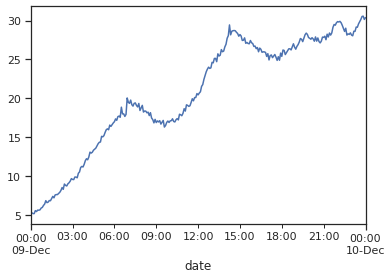

In [147]:
weeks[-1].P1.plot()

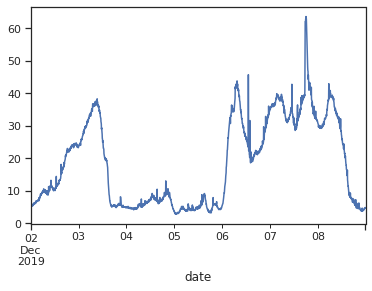

In [148]:
weeks[len(weeks)-2].P1.plot()

In [149]:
w = weeks[-3]

In [150]:
w['P1'] = w.P1.interpolate()

In [151]:
w['P1'] = w.P1.rolling(4, min_periods=1).mean()

In [152]:
w.head()

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std
date,,,,,,,,,,
2019-11-25 00:00:00,14.894350,6.663778,101191.336742,-2.962828,52.592721,5.862293,2.457720,367.656345,4.908199,20.843871
2019-11-25 00:05:00,14.807847,6.573957,101174.068406,-3.027836,53.101126,5.949923,2.557943,384.355104,4.810985,20.513270
2019-11-25 00:10:00,14.978547,6.762893,101171.823500,-3.042243,53.012386,15.316637,2.647697,389.768029,4.869241,20.731427
2019-11-25 00:15:00,15.015489,6.690761,101169.175605,-3.087565,53.136500,6.329640,2.739993,388.081864,4.888582,20.796264
2019-11-25 00:20:00,15.077131,6.814267,101165.616864,-3.101593,53.190856,6.341974,2.734663,390.582261,4.899628,20.820331


In [153]:
freq = round(60*25/5) # 1 day
decomp = sm.tsa.seasonal_decompose(w.P1, model='additive', freq=freq, extrapolate_trend='freq')

In [172]:
decomp.resid.mean(), decomp.resid.median(), decomp.resid.std(), decomp.resid.quantile(0.85)

(0.48704994742051166, 0.1513588956189257, 9.667148247422352, 8.983190429116394)

In [155]:
q = decomp.resid.quantile(0.85)

In [156]:
idx = decomp.resid[abs(decomp.resid)>q].index
idx[0]

Timestamp('2019-11-26 07:35:00')

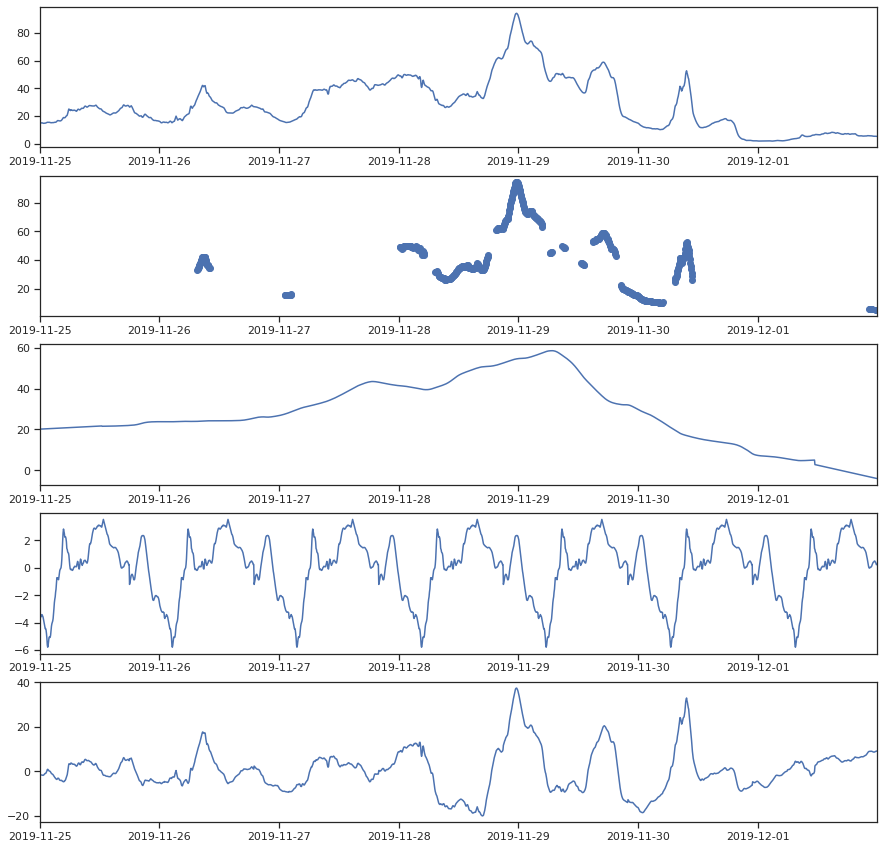

In [157]:
f, axs = plt.subplots(5,1,figsize=(15,15))
axs[0].plot(decomp.observed)
axs[1].plot(decomp.observed[idx], 'o')
axs[2].plot(decomp.trend)
axs[3].plot(decomp.seasonal)
axs[4].plot(decomp.resid)
for a in axs:
    a.set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
#axs[0].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
#axs[1].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
#axs[2].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
#axs[3].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))
#axs[4].set_xlim((min(decomp.observed.index), max(decomp.observed.index)))

In [158]:
w['trend'] = decomp.trend
w['seasonal'] = decomp.seasonal
w['resid'] = decomp.resid
w['anomaly'] = abs(w.resid)>q

In [159]:
anomaly = w[w['anomaly']]
anomaly['gap'] = (anomaly.index.to_series().diff()) > pd.Timedelta(10, 'm')

/home/anatoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
anomaly[anomaly.gap]

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std,trend,seasonal,resid,anomaly,gap
date,,,,,,,,,,,,,,,
2019-11-27 01:10:00,15.666031,7.498676,97630.934628,1.774037,58.086297,5.734958,2.482063,14407.045118,4.182434,21.994127,27.528978,-2.875425,-8.987522,True,True
2019-11-28 00:15:00,49.003972,20.892824,97006.039317,1.669682,61.044642,16.543219,6.096517,15373.710277,4.308483,24.072248,41.374207,-1.363824,8.993589,True,True
2019-11-28 00:45:00,48.004034,20.074517,96930.736150,1.471057,61.652600,19.343551,7.605043,15562.973292,4.319122,24.299351,41.274685,-2.366293,9.095643,True,True
2019-11-28 04:45:00,43.285258,20.751389,93936.634722,2.367099,58.076944,20.381639,7.440580,23197.590644,6.103123,25.417361,39.633141,-5.401279,9.053396,True,True
2019-11-28 07:20:00,31.671235,13.612043,97124.037616,1.724961,57.175465,14.473394,5.602653,15013.876340,3.919993,22.068321,40.441156,0.231123,-9.001045,True,True
2019-11-28 19:35:00,60.889348,26.567432,95053.014792,1.799907,62.458333,21.392253,8.591506,20038.585747,1.617901,29.987712,51.460279,0.043595,9.385474,True,True
2019-11-28 20:50:00,61.822850,26.644407,96119.631111,2.884192,67.713232,21.127108,7.630223,17081.529261,4.389114,22.762676,52.408979,0.227350,9.186520,True,True
2019-11-29 06:20:00,45.160982,19.471638,96704.200960,3.959968,72.034509,20.721563,6.835286,14431.413358,3.753983,26.378714,58.498660,-4.255721,-9.081957,True,True
2019-11-29 08:40:00,50.084197,22.553500,96585.797039,4.580712,72.121956,17.545018,6.970835,14580.157830,3.433309,26.116111,56.528368,2.547588,-8.991759,True,True


In [161]:
l_mod = pd.to_datetime(anomaly[anomaly.gap].index)
l_mod = l_mod.insert(0, anomaly.index[0])
l_mod = l_mod.insert(len(l_mod), anomaly.index[-1])
l_mod 

DatetimeIndex(['2019-11-26 07:35:00', '2019-11-27 01:10:00',
               '2019-11-28 00:15:00', '2019-11-28 00:45:00',
               '2019-11-28 04:45:00', '2019-11-28 07:20:00',
               '2019-11-28 19:35:00', '2019-11-28 20:50:00',
               '2019-11-29 06:20:00', '2019-11-29 08:40:00',
               '2019-11-29 09:10:00', '2019-11-29 12:40:00',
               '2019-11-29 14:55:00', '2019-11-29 20:35:00',
               '2019-11-30 07:20:00', '2019-12-01 22:25:00',
               '2019-12-01 23:45:00', '2019-12-01 23:55:00'],
              dtype='datetime64[ns]', name='date', freq=None)

In [162]:
anomaly.index[-1]

Timestamp('2019-12-01 23:55:00')

In [171]:
l = [anomaly[l_mod[n]:l_mod[n+1]] for n in range(0, len(l_mod)-1, 1)]
l = [i[:-1] for i in l]
l = [i for i in l if len(i) > 12]

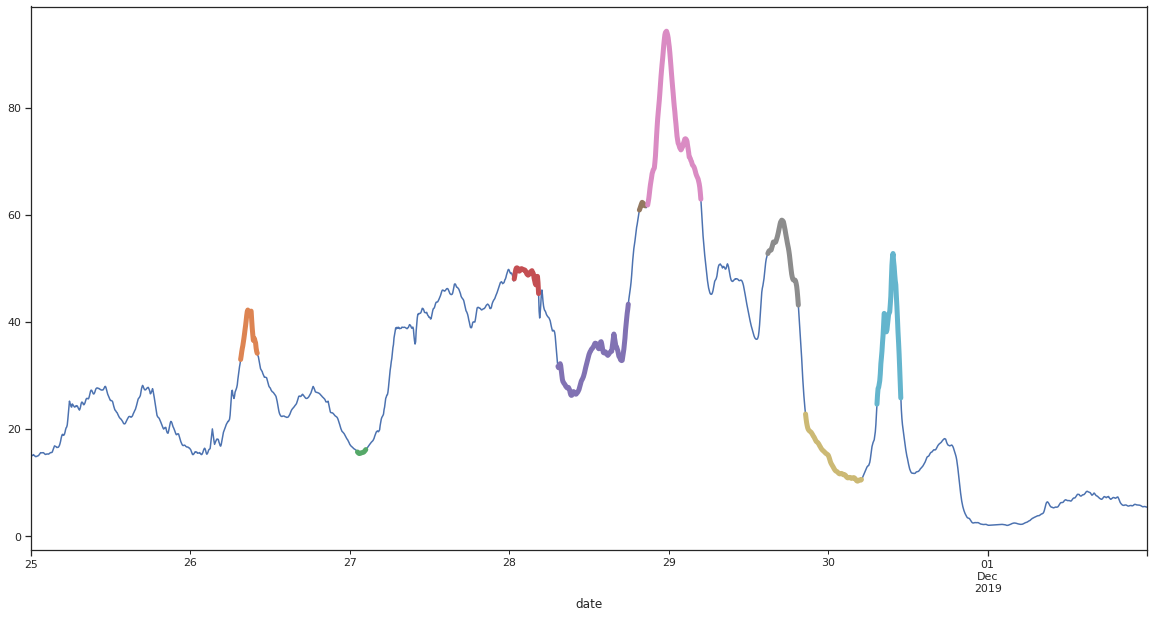

In [170]:
plt.figure(figsize=(20,10))
w.P1.plot()
for i in l:
    i.P1.plot(linewidth=5)

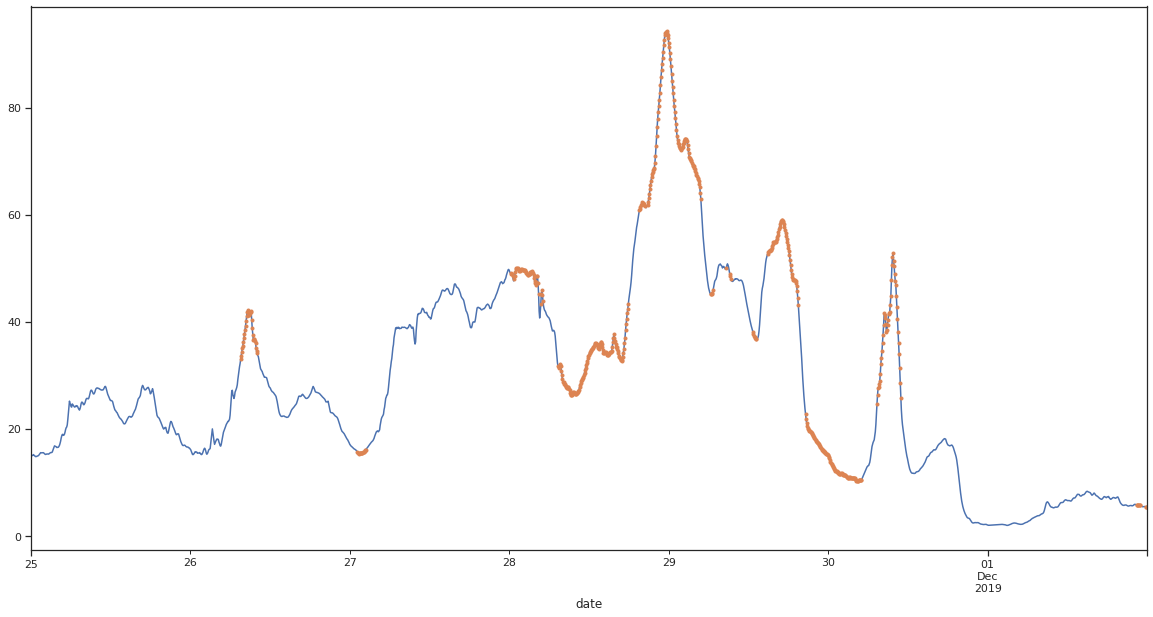

In [166]:
plt.figure(figsize=(20,10))
w.P1.plot()
anomaly.P1.plot(style='.')